# Short data analyzing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.decomposition import PCA

In [26]:
df=pd.read_csv("data/Wine.csv")

In [27]:
null_values=df.isnull().sum()
print("Null Values in Body Performance Dataset:",null_values)

Null Values in Body Performance Dataset: Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [30]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


# Scale Data 
### Scaling is essential because K-Means and EM use distance or density metrics, and unscaled features distort results. Proper scaling ensures all features contribute equally, improving clustering accuracy and stability.

In [36]:
scaler = StandardScaler()

X = df.drop(columns=['Customer_Segment'])
y= df['Customer_Segment']

X_scaled = scaler.fit_transform(X)


In [40]:
def calculate_silhouette_scores(model_type, X, k_range):
    scores = []
    for k in k_range:
        if model_type == 'kmeans':
            model = KMeans(n_clusters=k, random_state=42, n_init=10)
        elif model_type == 'gmm':
            model = GaussianMixture(n_components=k, random_state=42,n_init=10)
        else:
            raise ValueError("model_type must be 'kmeans' or 'gmm'")

        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
    return scores

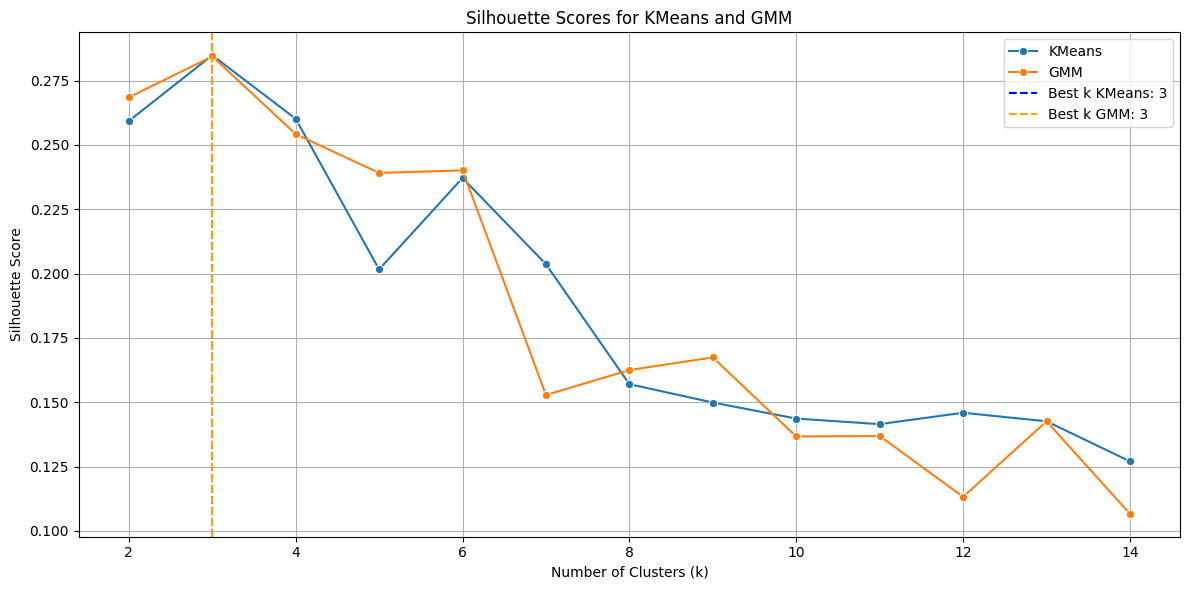

In [ ]:
k_range = range(2, 15)

kmeans_scores = calculate_silhouette_scores("kmeans", X_scaled, k_range)
gmm_scores = calculate_silhouette_scores("gmm", X_scaled, k_range)

best_k_kmeans = k_range[np.argmax(kmeans_scores)]
best_k_gmm = k_range[np.argmax(gmm_scores)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=list(k_range), y=kmeans_scores, label="KMeans", marker="o")
sns.lineplot(x=list(k_range), y=gmm_scores, label="GMM", marker="o")
plt.axvline(
    best_k_kmeans, linestyle="--", color="blue", label=f"Best k KMeans: {best_k_kmeans}"
)
plt.axvline(
    best_k_gmm, linestyle="--", color="orange", label=f"Best k GMM: {best_k_gmm}"
)
plt.title("Silhouette Scores for KMeans and GMM")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### ‼️ KMeans uses stricter separation rules which is sometimes not correct and is used for simpler data, where speed is needed.

### ‼️ GMM will learn the correct elliptical shape and calculate realistic probabilities which makes it a little more advanced.

### ‼️ This is not seen in the plot because the dataset is simple without complex relationships between columns and both algorithms perform well

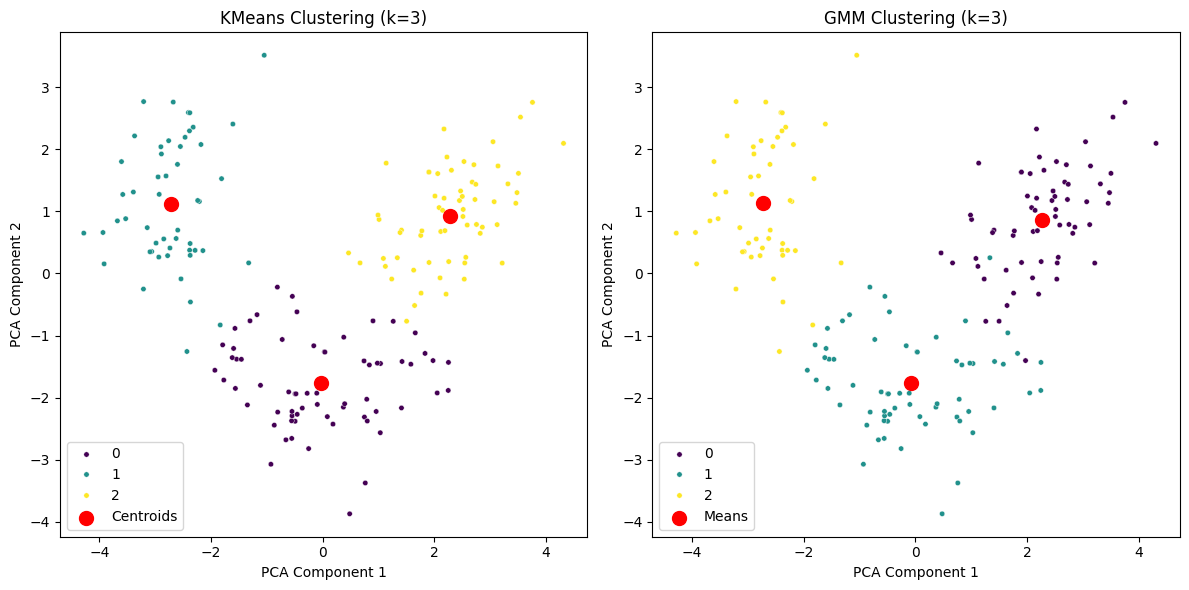

In [ ]:
# --- Apply PCA to reduce to 2 dimensions for visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=best_k_kmeans, random_state=42, n_init=10)
gmm = GaussianMixture(n_components=best_k_gmm, random_state=42, n_init=10)

kmeans_labels = kmeans.fit_predict(X_scaled)
gmm_labels = gmm.fit_predict(X_scaled)

kmeans_centroids = kmeans.cluster_centers_
gmm_means = gmm.means_

kmeans_centroids_2d = pca.transform(kmeans_centroids)
gmm_means_2d = pca.transform(gmm_means)

plt.figure(figsize=(12, 6))

# --- KMeans plot ---
plt.subplot(1, 2, 1)
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=kmeans_labels,
    palette="viridis",
    s=15,
    legend="full",
)
plt.scatter(
    kmeans_centroids_2d[:, 0],
    kmeans_centroids_2d[:, 1],
    c="red",
    s=100,
    marker="o",
    label="Centroids",
)
plt.title(f"KMeans Clustering (k={best_k_kmeans})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

# --- GMM plot ---
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette="viridis", s=15, legend="full"
)
plt.scatter(
    gmm_means_2d[:, 0], gmm_means_2d[:, 1], c="red", s=100, marker="o", label="Means"
)
plt.title(f"GMM Clustering (k={best_k_gmm})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
kmeans_centroids_original = scaler.inverse_transform(kmeans_centroids)
gmm_means_original = scaler.inverse_transform(gmm_means)

columns_without_segment = df.columns.drop('Customer_Segment')

kmeans_df = pd.DataFrame(kmeans_centroids_original, columns=columns_without_segment)
gmm_df = pd.DataFrame(gmm_means_original, columns=columns_without_segment)

kmeans_df.index = [f'Cluster {i+1}' for i in range(kmeans_df.shape[0])]
gmm_df.index = [f'Cluster {i+1}' for i in range(gmm_df.shape[0])]



In [62]:
from IPython.display import display

styled_kmeans_df = kmeans_df.round(2).style.set_caption("📊 KMeans Cluster Centroids").set_table_attributes("style='border:1px solid black;'").set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]},
])

styled_gmm_df = gmm_df.round(2).style.set_caption("📊 GMM Cluster Means").set_table_attributes("style='border:1px solid black;'").set_table_styles([
    {'selector': 'th', 'props': [('border', '1px solid black')]},
    {'selector': 'td', 'props': [('border', '1px solid black')]},
])

display(styled_kmeans_df)
display(styled_gmm_df)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster 1,12.250000,1.900000,2.230000,20.060000,92.740000,2.250000,2.050000,0.360000,1.620000,2.970000,1.060000,2.800000,510.170000
Cluster 2,13.130000,3.310000,2.420000,21.240000,98.670000,1.680000,0.820000,0.450000,1.150000,7.230000,0.690000,1.700000,619.060000
Cluster 3,13.680000,2.000000,2.470000,17.460000,107.970000,2.850000,3.000000,0.290000,1.920000,5.450000,1.070000,3.160000,1100.230000


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster 1,13.660000,1.970000,2.430000,17.240000,108.810000,2.810000,2.920000,0.290000,1.940000,5.360000,1.070000,3.140000,1096.700000
Cluster 2,12.240000,1.930000,2.260000,20.330000,91.580000,2.270000,2.110000,0.360000,1.600000,3.010000,1.060000,2.820000,501.540000
Cluster 3,13.130000,3.310000,2.420000,21.240000,98.680000,1.680000,0.820000,0.450000,1.150000,7.240000,0.690000,1.700000,619.210000


 ### ‼️ Kmeans, from the name itself, it is understood that it is the average, only that for the close values ​​in that column, in my case the average was made on the alcohol level and the rest of the columns were already distributed according to the alcohol level, while GMM uses a Gaussian distribution (mean and covariance)

In [65]:
def generate_customer_profiles(centroids_df, algo_name):
    print(f"\n🧍 Imaginary customers for {algo_name} clusters:")
    for cluster_id, row in centroids_df.iterrows():
        print(f"\n{cluster_id} ({algo_name}):")
        for feature, value in row.items():
            print(f" - {feature}: around {value:.1f}")



In [66]:
generate_customer_profiles(kmeans_df, "KMeans")



🧍 Imaginary customers for KMeans clusters:

Cluster 1 (KMeans):
 - Alcohol: around 12.3
 - Malic_Acid: around 1.9
 - Ash: around 2.2
 - Ash_Alcanity: around 20.1
 - Magnesium: around 92.7
 - Total_Phenols: around 2.2
 - Flavanoids: around 2.0
 - Nonflavanoid_Phenols: around 0.4
 - Proanthocyanins: around 1.6
 - Color_Intensity: around 3.0
 - Hue: around 1.1
 - OD280: around 2.8
 - Proline: around 510.2

Cluster 2 (KMeans):
 - Alcohol: around 13.1
 - Malic_Acid: around 3.3
 - Ash: around 2.4
 - Ash_Alcanity: around 21.2
 - Magnesium: around 98.7
 - Total_Phenols: around 1.7
 - Flavanoids: around 0.8
 - Nonflavanoid_Phenols: around 0.5
 - Proanthocyanins: around 1.1
 - Color_Intensity: around 7.2
 - Hue: around 0.7
 - OD280: around 1.7
 - Proline: around 619.1

Cluster 3 (KMeans):
 - Alcohol: around 13.7
 - Malic_Acid: around 2.0
 - Ash: around 2.5
 - Ash_Alcanity: around 17.5
 - Magnesium: around 108.0
 - Total_Phenols: around 2.8
 - Flavanoids: around 3.0
 - Nonflavanoid_Phenols: arou

In [64]:
generate_customer_profiles(gmm_df, "GMM")



🧍 Imaginary customers for GMM clusters:

Cluster 1 (GMM):
 - Alcohol: around 13.7
 - Malic_Acid: around 2.0
 - Ash: around 2.4
 - Ash_Alcanity: around 17.2
 - Magnesium: around 108.8
 - Total_Phenols: around 2.8
 - Flavanoids: around 2.9
 - Nonflavanoid_Phenols: around 0.3
 - Proanthocyanins: around 1.9
 - Color_Intensity: around 5.4
 - Hue: around 1.1
 - OD280: around 3.1
 - Proline: around 1096.7

Cluster 2 (GMM):
 - Alcohol: around 12.2
 - Malic_Acid: around 1.9
 - Ash: around 2.3
 - Ash_Alcanity: around 20.3
 - Magnesium: around 91.6
 - Total_Phenols: around 2.3
 - Flavanoids: around 2.1
 - Nonflavanoid_Phenols: around 0.4
 - Proanthocyanins: around 1.6
 - Color_Intensity: around 3.0
 - Hue: around 1.1
 - OD280: around 2.8
 - Proline: around 501.5

Cluster 3 (GMM):
 - Alcohol: around 13.1
 - Malic_Acid: around 3.3
 - Ash: around 2.4
 - Ash_Alcanity: around 21.2
 - Magnesium: around 98.7
 - Total_Phenols: around 1.7
 - Flavanoids: around 0.8
 - Nonflavanoid_Phenols: around 0.5
 - P